## Chapter 08. History of DL/MLP basic 

---

<br>

### 1. Modeling Neuron (1957)
- ML의 경우는 한계점으로 인해 "사람처럼 생각하는 기계"를 만들어 보자 
  -> Deep learning(인간의 뇌: Neuron의 구조) 시초
  -> 대표적인 문제: XOR problem 
<br>

[1] Axon from a neuron(이전 neuron)과 weight(weight(이전 neuron의 적절한 가중치) -> $x_{0}, x_{1}$, $w{0}, w_{1}$ <br>
[2] 각 nueron가 가중치를 내적 후 bias를 더함 <br>
[3] Activiation Function으르 거친 후 결과값을 다음 Neuron에 전달
(적절한 역치를 못넘으면 -> 다음 Neuron 활성화가 되지 않기 때문 / Nonlinear) <br>
[4] Backpropagation
<br> 

### 2. Multi-layer perception  
- 하나의 layer를 Metrix 표현 가능: $WX + B$ <br>
- XOR problem: (1) is ther any ohter W and b that solves XOR problem?  (many) (2) if then, how can we find it with training algorithm? 

<br> 
#### 2.1 Universal Approximation Theorem
- MLP(hidden unit커지거나 layer의 깊이가 깊어지면) 어떤 함수든 근사할 수 있다는 이론  <br>
- A feed-forward networkd with single hidden layer is sufficient to represent any function, but the required hidden unit might be infinitely large and may fail to learn. <br>
- Using deeper model can reduce the number of required units for representing desired function. <br>

#### 2.2 Backpropagation with chain Rule
- 복잡한 Network에 대해서 Competation Graph <br>
[1] feed forward : w, b(intialization parameter) 값을 계산하는 과정 <br>
[2] Backpropagation: w,b 각각의 Parameter가 loss에 얼마나 영향을 미치는지  

<br>

### 3. Convolutional Neural Networks   
- " Training  과정이 너무 복잡하다(MLP)"는 단점
- Image를 하나의 Neuron 작은 부분만 본 이후 -> 점차 뒤를 가면서 Image의 큰 부분 학인


## Chapter 09. MLP Regression with Pytorch (Labe) 

### Lab2. Pytorch Regression (Logistic Regression vs MLP)

#### Install Pytorch 1.0 (For Google Colab)

In [1]:
"""#구글 Colab에서 실행할 때는 이 주석을 해제하시고 실행해서 pytorch 1.0을 깔아주세요! """
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

     |████████████████████████████████| 591.8 MB 656 bytes/s 
     |████████████████████████████████| 23.3 MB 1.2 MB/s 
     |████████████████████████████████| 23.3 MB 486 kB/s 
     |████████████████████████████████| 22.1 MB 82.8 MB/s 
     |████████████████████████████████| 22.1 MB 62.3 MB/s 
     |████████████████████████████████| 17.4 MB 77.7 MB/s 
     |████████████████████████████████| 17.3 MB 26.3 MB/s 
     |████████████████████████████████| 12.8 MB 84.1 MB/s 
     |████████████████████████████████| 12.7 MB 87.9 MB/s 
     |████████████████████████████████| 11.8 MB 62.7 MB/s 
     |████████████████████████████████| 5.9 MB 32.9 MB/s 
     |████████████████████████████████| 6.6 MB 62.4 MB/s 
     |████████████████████████████████| 6.6 MB 66.5 MB/s 
     |████████████████████████████████| 4.0 MB 21.9 MB/s 
     |████████████████████████████████| 10.2 MB 64.1 MB/s 
     |████████████████████████████████| 10.1 MB 71.3 MB/s 
     |████████████████████████████████| 8.8 MB 61.5 MB/s 
 

#### 1. Data Generation  (Preparation)

- 실습 문제: 2차원 입력데이터로 y의 분포를 예측(regression)
- X(input): 2차원,  continuous space 분포 / Y(Class): 1차
- 위의 분포에서 관측시 발생한 오차 $e$를 더해져 있는 상황

<br>

$$ e \sim \mathcal{N} (0, 0.5) $$
$$ y = \ 2 sin(x_1) + log({1 \over 2}x_2^2) + e$$  

<br>
**Data Set**  <br>
- 총 2400개 중 train 1600개 / validatino 400개 / test 400개

$$X_{train} \in \mathcal{R}^{1600 \times 2}, Y_{train} \in \mathcal{R}^{1600}$$  
$$X_{val} \in \mathcal{R}^{400 \times 2}, Y_{val} \in \mathcal{R}^{400}$$  
$$X_{test} \in \mathcal{R}^{400 \times 2}, Y_{test} \in \mathcal{R}^{400}$$

<br>
- 앞의 Linear regression과 동일


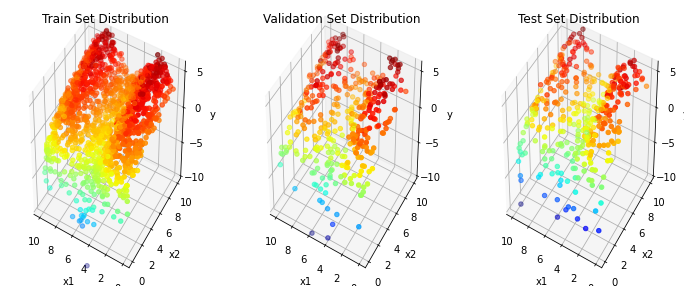

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


## (1) Generating Dataset
num_data = 2400                             # data 개수
x1 = np.random.rand(num_data) * 10          # x1 데이터 생성(x1의 range: 0 ~ 10)
x2 = np.random.rand(num_data) * 10          # x2 데이터 생성(x2의 range: 0 ~ 10)
e = np.random.normal(0, 0.5, num_data)      # 오차 생성
X = np.array([x1, x2]).T                    # input vector 생성
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e    # 정답 y 값 생성

## (2) Split the Dataset(Train, Validation, Test) 
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

## (3) Visualization data
# 3.1 Train set 분포
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d') # 3차원으로 시각화
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet') # 색깔: y 값(값이 진할수록[빨강색] 높음)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

# 3-2. validation set 분포
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

# 3.3 Test set 분포
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

#### 2. Hypothesis Define (Model Define)  

- Logistic Regression Model을 파이토치로 구현할 때 -> nn.Linear 모듈과 non-linear activation fuction 필요
- 주의할 점: Module 내에서 softxmax를 사용할 필 요 없음(파이썬 내장 CrossEntropyLoss 함수에 포함되어 있음)

**MLP Model**
$$Let \ relu(X) = \ max(X, 0)$$  

$$h = \ relu(X W_1 + b_1) \ \  ( W_1 \in \mathcal{R}^{2 \times 200}, b_1 \in \mathcal{R}^{200}, h \in \mathcal{R}^{N \times 200})$$  

$$H = \ h W_2 + b_2  \ \  ( W_2 \in \mathcal{R}^{200 \times 1}, b_2 \in \mathcal{R}^{1}, H \in \mathcal{R}^{N  \times 1})$$

In [3]:
import torch
import torch.nn as nn

class MLPModel(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim):    # Tip: 여러 번으이 심험을 위해서 변수로 변화
        super(MLPModel, self).__init__()    
        self.linear1 = nn.Linear(in_dim, hid_dim)    # 2차원을 200차원을 unit(hidden layer)
        self.linear2 = nn.Linear(hid_dim, out_dim)   # 200차원을 1차원으로 unit
        self.act = nn.ReLU()                         # Activation Function

    def forward(self, x):                            # x가 인풋으로 들어왔을 때 모델이 예측하는 y값 반환(hidden layer 1개 거침)
        x = self.linear1(x)
        x = self.act(x)
        x = self.linear2(x)
        return x

m = MLPModel(2, 1, 200)

# question: layer 수를 변수화는 어떻게 할까(제작해보기)

#### 3. Cost Function Define (Loss Function Define)  
- Regression: MSE Loss

In [4]:
reg_loss = nn.MSELoss()

### 4. Train & Evaluation

Pytorch 내 
- loss.backward() 기능: parameter에 대한 loss 편미분 자동 계산
- optimizer.step()기능: Gradient 바탕으로 parameter 값을 updata
- 모델 내에서 Train data 학습 -> validation set를 넣고 loss 비교
- Regression Task(Metrix: MAE)

$$MAE(Y_{true}, Y_{predict}) = \sum_{i} | \ y_{true}^{(i)} - y_{predict}^{(i)} \ | $$

In [5]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

# 1. Construction Model
model = MLPModel(2, 1, 300) # Linear regression 평면으로 인식못하는 문제를 MLP(Hidden layer 1층)로 어느정도 해결

print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 모델 내의 학습 parameter 수 counting

# 2. Constrruction Optimizer
lr = 0.005  # learning rate(Hyperparameter / 학습률)
optimizer = optim.SGD(model.parameters(), lr = lr) # Optimizer: SGD(model Parameter + learning rate)
epoch = 4000 # 학습 횟수(epoch)

## 학습 단계 epoch별 loss 및 Metrix(MAE loss)를 저장할 list 생성
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

1201 parameters


In [6]:
# 3. Model 학습
for i in range(epoch):

    # 3.1 Model train
    model.train()         # Model Train setting 
    optimizer.zero_grad() # optimizer 초기화(Gradient = 0으로 초기화).
    
    ## Train 데이터 입력  
    input_x = torch.Tensor(train_X)       
    true_y = torch.Tensor(train_y)        # target 값 long(정수)
    pred_y = model(input_x)               # model prediction
    
    ## loss 계산
    loss = reg_loss(pred_y.squeeze(), true_y) # loss 계산(앞선 정의한 loss function / crossentropy) / whu? squeeze 
    loss.backward()                           # Gradient 계산.
    optimizer.step()                          # Gradient(backward) 기준으로 parameter updata / learning rate 만큼 updata 

    ## 학습 과정 결과 저장(loss & accuracy)
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy()) # loss 자체 형식: "tensor(1.0518, grad_fn=<NllLossBackward>) -> 연산 기록을 분리(Tensor가 기록 추적 중단) 후 numpy 형식 저장"
    
    
    # 3.2 model 검증 
    model.eval()          # Model test setting
    optimizer.zero_grad() # optimizer 초기화(상동)

    ## Validation data 입력
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   

    ## loss 계산(train과 다른점: Gradient 계산 및 parameter updata가 진행 안됨)
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    # 3.3 Modlel 평가 / 3.4 학습 과정 visualization
    if i % 200 == 0:  # epoch: 200별로 데이터 분포와 모델이 예측한 분포 시각화
        
        ## 모델 평가(Metrix)
        model.eval()
        optimizer.zero_grad()

        ## Test data 입력
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)

        ##  model(input_x).detach(): 각 데이터별로 loss 값
        pred_y = model(input_x).detach().numpy() 

        ## mae 계산 / 주의할점: (sklearn 쪽 함수) true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것
        mae = mean_absolute_error(true_y, pred_y)
        list_mae.append(mae)                     # epoch별 mae 
        list_mae_epoch.append(i)                 # epoch 저장
        
        ## 시각화
        fig = plt.figure(figsize=(15,5))
        
        ## 3.4.1 실제 값(y) Visualization
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        ## 3.4.2 test 예측 값(y_hat) Visualization
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ## 3.4.3 train 예측 값(y_hat) Visualization
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

Output hidden; open in https://colab.research.google.com to view.

### 5. Report Experiment  
1. 학습 과정에서 epoch별 train과 validation loss 시각화(과적합 여부 판단)
- valdation loss가 증가하기 시작하면 -> 과적합 
학습 과정에서 기록했던 train_loss와 val_loss를 그려보기 

2. epoch별 Accuracy(MAE metric) 시각화

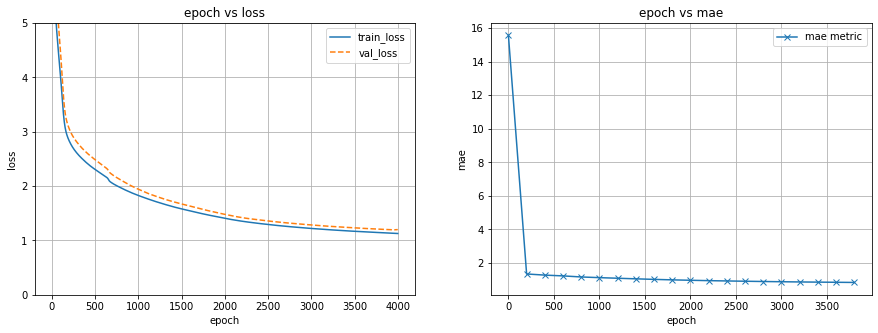

In [7]:
fig = plt.figure(figsize=(15,5))

# Loss function Visualization
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')       # epoch별 train loss 변화 시각화
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')     # epoch별 validation loss 변화 시각화
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# epoch별 mae 변화: mae 어느정도 수렴하는 것 확인
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()

### Lab3. Pytorch Classification (Logistic Regression vs MLP)

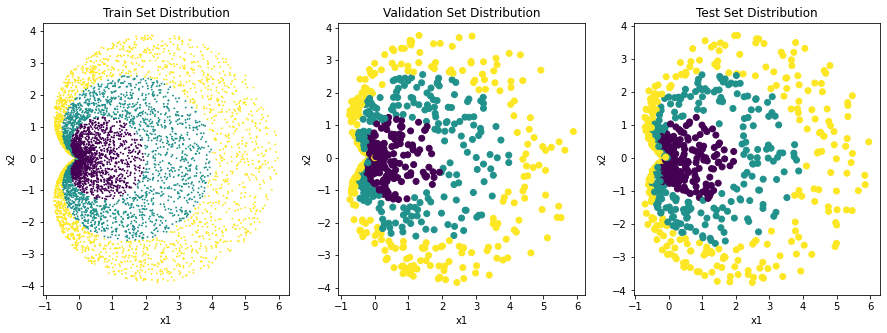

In [8]:
# classification data generation
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# (1) Generating Dataset
r = np.random.rand(10000)*3             # Y의 값을 Random sampling
theta = np.random.rand(10000)*2*np.pi   # 
y = r.astype(int)                       # Y의 값을 정수형(분류 Class)
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta) 
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T
 
# (2) Split the Dataset(Train, Validation, Test) 
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

# (3) Visualization data
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=0.7)   # Train 시각화(color: class / 크기 0.7) 
ax1.set_xlabel('x1')                                          # plot xlabel, ylabel 정의
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')                       # plot title 정의

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c=val_y)                # Validation 시각화
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c=test_y)             # Test 시각화
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

plt.show()

#### 2. Hypothesis Define (Model Define)  

- Logistic Regression Model을 파이토치로 구현할 때 -> nn.Linear 모듈과 non-linear activation fuction 필요
- 주의할 점: Module 내에서 softxmax를 사용할 필 요 없음(파이썬 내장 CrossEntropyLoss 함수에 포함되어 있음)

<br> 

**MLP Model**
$$Let \ relu(X) = \ max(X, 0)$$  

$$h = \ relu(X W_1 + b_1) \ \  ( W_1 \in \mathcal{R}^{2 \times 200}, b_1 \in \mathcal{R}^{200}, h \in \mathcal{R}^{N \times 200}$$  

$$z = \ h W_2 + b_2  \ \  ( W_2 \in \mathcal{R}^{200 \times 3}, b_2 \in \mathcal{R}^{3}, z \in \mathcal{R}^{N  \times 3})$$  

$$H = \ softmax(z) \ \ ( H \in \mathcal{R}^{N \times 3})$$  


<br>

- $ W $ : input(2차원) -> class 개수(3차원) / ${2 \times 3}$ Metrix 
- $ b $ : 3차원(class 편향) / ${1 \times 3}$ Metrix 
- $ z $ : N은 데이터 개수 / ${N \times 3}$ Metrix 

#### 3, cost function  Define
- Multi-Label Problem Loss Funcntion 생성
- 참고사이트: https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
- CrossEntropy Doumentation: https://pytorch.org/docs/stable/nn.html#crossentropyloss


`input`: $ N \times Num Class $ 차원, float 형태  
`target(label)`: $ N $ 차원(i: i번쨰 class), int 형태

In [11]:
# model 생성
class MLPModel(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim):    # Tip: 여러 번으이 심험을 위해서 변수로 변화
        super(MLPModel, self).__init__()    
        self.linear1 = nn.Linear(in_dim, hid_dim)    # 2차원을 200차원을 unit(hidden layer)
        self.linear2 = nn.Linear(hid_dim, out_dim)   # 200차원을 1차원ㅇ로 unit
        self.act = nn.ReLU()                         # Activation Function

    def forward(self, x):
        x = self.linear1(x)
        x = self.act(x)
        x = self.linear2(x)
        return x

m = MLPModel(2, 3, 200)

# loss function 정의
cls_loss = nn.CrossEntropyLoss()

In [14]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# 1. Construction Model
model = MLPModel(2, 3, 300) # Linear regression 평면으로 인식못하는 문제를 MLP(Hidden layer 1층)로 어느정도 해결

print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 모델 내의 학습 parameter 수 counting

# 2. Constrruction Optimizer
lr = 0.005  # learning rate(Hyperparameter / 학습률)
optimizer = optim.SGD(model.parameters(), lr = lr) # Optimizer: SGD(model Parameter + learning rate)
epoch = 4000 # 학습 횟수(epoch)

## 학습 단계 epoch별 loss 및 Metrix(정확도)를 저장할 list 생성
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

1803 parameters


### 4. Train & Evaluation
accuracy_score Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    
$$ Accuracy = \frac{Number \ of \ correct \ prediction}{Total \ number \ of \ predictions \ made} $$

#### 결과: classficiation 상대적으로 성능 향상

In [15]:
# 3. Model 학습
for i in range(epoch):
    
    # 3.1 Model train
    model.train()         # Model Train setting 
    optimizer.zero_grad() # optimizer 초기화(Gradient = 0으로 초기화).
    
    ## Train 데이터 입력  
    input_x = torch.Tensor(train_X)       
    true_y = torch.Tensor(train_y).long() # target 값 long(정수)
    pred_y = model(input_x)               # model prediction
    
    ## loss 계산
    loss = cls_loss(pred_y.squeeze(), true_y) # loss 계산(앞선 정의한 loss function / crossentropy) / whu? squeeze 
    loss.backward()                           # Gradient 계산.
    optimizer.step()                          # Gradient(backward) 기준으로 parameter updata / learning rate 만큼 updata 

    ## 학습 과정 결과 저장(loss & accuracy)
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy()) # loss 자체 형식: "tensor(1.0518, grad_fn=<NllLossBackward>) -> 연산 기록을 분리(Tensor가 기록 추적 중단) 후 numpy 형식 저장"
    
    
    # 3.2 model 검증 
    model.eval()          # Model test setting
    optimizer.zero_grad() # optimizer 초기화(상동)

    ## Validation data 입력
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y).long()
    pred_y = model(input_x)   

    ## loss 계산(train과 다른점: Gradient 계산 및 parameter updata가 진행 안됨)
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    # 3.3 Modlel 평가 / 3.4 학습 과정 visualization
    if i % 200 == 0: # epoch: 200별로 데이터 분포와 모델이 예측한 분포 시각화
        
        # 모델 평가(Metrix)
        model.eval()
        optimizer.zero_grad()

        ## Test data 입력
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)

        # model(input_x).detach(): 각 데이터별로 class 확률 값 ->.max(dim = 1)[1]: axis = 1 차원별(각 데이터 별) max 값(가장 높은 확률 값과 대응하는 class)을 통해 예측 class 추출 -> .numpy() 형식 저장
        pred_y = model(input_x).detach().max(dim=1)[1].numpy()  

        ## 
        acc = accuracy_score(true_y, pred_y) # 주의할점: (sklearn 쪽 함수) true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것
        list_acc.append(acc)                 # epoch별 test 정확도
        list_acc_epoch.append(i)             # epoch 저장 

        ## 시각화
        fig = plt.figure(figsize=(15,5))
        
        ## 3.4.1 실제 값(y) Visualization
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ## 3.4.2 예측 값(y hat) Visualization
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(test_X[:, 0], test_X[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')
        
        ## 3.4.3 정확도(train)
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(train_X[:, 0], train_X[:, 1], c=pred_y)
        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_title('Prediction on train set')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

Output hidden; open in https://colab.research.google.com to view.

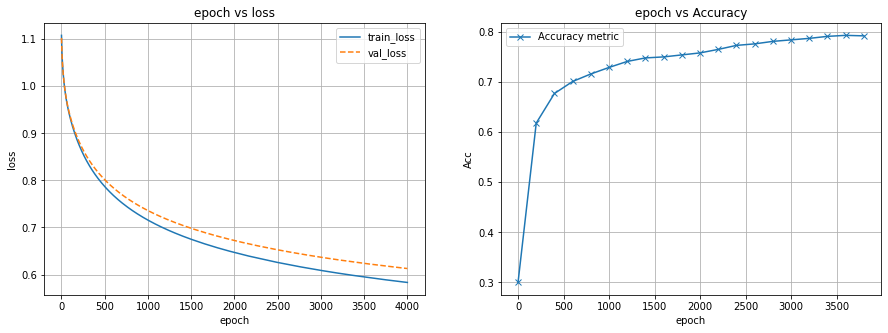

In [16]:
fig = plt.figure(figsize=(15,5))

# Loss function Visualization
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')   # epoch별 train loss 변화 시각화
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss') # epoch별 validation loss 변화 시각화
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# Accuracy(Metrix) Visualization
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric') # epoch별 정확도 확인(성능 확인)
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()